# Introdução a Inteligência Artificial - Atividade 5
## Alunos: Thiago Rodrigues Cruz Justino, Daniele V. Morais silva, Guilherme Barboza

### 1) Com o espaço de estados das cidades da Romênia, escolha duas cidades para buscar uma rota usando a implementação de busca em largura que foi vista nos vídeos. Mostre o passo a passo da busca.

### Resolução:
Observando as características do ambiente: observável, discreto, determinístico, conhecido.

Formulação:
 - Estado inicial: Usuário decide qual cidade inicia.
 - Ações: Mudar de cidades.
 - Modelo de transição: Obdecer as informações do mapa de forma a obter o menor custo.
 - Teste de objetivo: Usuário decide qual é a cidade final.
 - Custo das ações: Cada viajem tem seu valor.

Acima está o espaço de estados que podem ser enxergados como árvore de busca, nesse caso. Simplificando e usando algumas cidades da Romênia, temos as seguintes cidades seguidas de suas "vizinhas" e entre parenteses o custo:

Arad -> Zerind(75), Sibiu(140), Timisoara(118)

Oradea -> Zerind(71), Sibiu(151)

Zerind -> Arad(75), Oradea(71)

Sibiu -> Arad(140), Oradea(151)

Timisoara -> Arad(118), Lugoj(111)

Decidimos fazer duas abordagens utilizando funções e definindo classes como feito nos vídeos postados. Abaixo está o código "alternativo" que recebe os estados e retorna todos os caminhos e ainda seleciona o que possui menor custo.


In [ ]:
from collections import deque

def busca_em_largura(estado_inicial, estado_final, acoes_por_estado):
    fila = deque([[estado_inicial]])
    todos_caminhos = []
    visitados = set()

    while fila:
        caminho = fila.popleft()
        estado_atual = caminho[-1]

        if estado_atual == estado_final:
            todos_caminhos.append(caminho)

        if estado_atual not in visitados:
            visitados.add(estado_atual)
            for acao, _ in obter_acoes(estado_atual, acoes_por_estado):
                novo_caminho = list(caminho)
                novo_caminho.append(acao)
                fila.append(novo_caminho)

    return todos_caminhos

def obter_acoes(estado, acoes_por_estado):
    for estado_info in acoes_por_estado:
        if estado_info["estado"] == estado:
            return estado_info["acoes"]
    return []  # Retorna uma lista vazia caso não encontre nenhuma ação para o estado

def calcular_custo_total(caminho, acoes_por_estado):
    custo_total = 0
    for i in range(len(caminho) - 1):
        estado_atual = caminho[i]
        estado_destino = caminho[i + 1]
        for acao, custo in obter_acoes(estado_atual, acoes_por_estado):
            if acao == estado_destino:
                custo_total += custo
    return custo_total

# Exemplo de utilização:
acoes_por_estado = [
    {'estado': 'Arad', 'acoes': [('Zerind', 75), ('Sibiu', 140), ('Timisoara', 118)]},
    {'estado': 'Zerind', 'acoes': [('Arad', 75), ('Oradea', 71)]},
    {'estado': 'Timisoara', 'acoes': [('Arad', 118), ('Lugoj', 111)]},
    {'estado': 'Sibiu','acoes': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu Vilcea', 80)]},
    {'estado': 'Oradea', 'acoes': [('Zerind', 71), ('Sibiu', 151)]},
    {'estado': 'Lugoj', 'acoes': [('Timisoara', 111), ('Mehadia', 70)]},
    {'estado': 'Mehadia', 'acoes': [('Lugoj', 70), ('Drobeta', 75)]},
    {'estado': 'Drobeta', 'acoes': [('Mehadia', 75), ('Craiova', 120)]},
    {'estado': 'Craiova', 'acoes': [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)]},
    {'estado': 'Rimnicu Vilcea', 'acoes': [('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)]},
    {'estado': 'Fagaras', 'acoes': [('Sibiu', 99), ('Bucharest', 211)]},
    {'estado': 'Pitesti', 'acoes': [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)]},
    {'estado': 'Giurgiu', 'acoes': [('Bucharest', 90)]},
    {'estado': 'Bucharest', 'acoes': [('Fagaras', 211), ('Pitesti', 101), ('Giurgiu', 90), ('Urziceni', 85)]},
    {'estado': 'Urziceni','acoes': [('Bucharest', 85), ('Vaslui', 142), ('Hirsova', 98)]},
    {'estado': 'Hirsova','acoes': [('Urziceni', 98), ('Eforie', 86)]},
    {'estado': 'Eforie','acoes': [('Hirsova', 86)]},
    {'estado': 'Vaslui','acoes': [('Urziceni', 142), ('Iasi', 92)]},
    {'estado': 'Iasi','acoes': [('Vaslui', 92), ('Neamt', 87)]},
    {'estado': 'Neamt', 'acoes': [('Iasi', 87)]}
]

print('----------------Encontre todos os caminhos-----------------')
inicial = input('Digite o local de inicio: ')
destino = input('Digite o local de destino: ')
todos_caminhos = busca_em_largura(inicial, destino, acoes_por_estado)

if todos_caminhos:
    print(f"Foram encontrados {len(todos_caminhos)} caminhos possíveis:")
    for idx, caminho in enumerate(todos_caminhos):
        print(f"Caminho: {' -> '.join(caminho)}")
        custo = calcular_custo_total(caminho, acoes_por_estado)
        print(f"Custo total: {custo}")
    menor_caminho = min(todos_caminhos, key=lambda c: calcular_custo_total(c, acoes_por_estado))
    menor_custo = calcular_custo_total(menor_caminho, acoes_por_estado)
    print(f"\nO caminho com o menor custo é: {' -> '.join(menor_caminho)}")
    print(f"Custo total do menor caminho: {menor_custo}")
else:
    print("Não foi possível encontrar um caminho válido.")


----------------Encontre todos os caminhos-----------------
Digite o local de inicio: Arad
Digite o local de destino: Bucharest
Foram encontrados 4 caminhos possíveis:
Caminho: Arad -> Sibiu -> Fagaras -> Bucharest
Custo total: 450
Caminho: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest
Custo total: 418
Caminho: Arad -> Sibiu -> Fagaras -> Bucharest -> Giurgiu -> Bucharest
Custo total: 630
Caminho: Arad -> Sibiu -> Fagaras -> Bucharest -> Urziceni -> Bucharest
Custo total: 620

O caminho com o menor custo é: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest
Custo total do menor caminho: 418


###2) Usando a implementação de busca em largura que foi vista no vídeo como base, crie uma implementação similar para a busca em profundidade. O vídeo sobre busca em profundidade explica qual alteração deve ser feita. A implementação deve seguir o modelo da busca em largura e ter uma função que permita executar apenas um passo da busca de cada vez.

###Resolução:

Utilizando o código-fonte de busca em largura como base, nele foram realizadas algumas alterações para que pudesse realizar a busca em profundidade. As linhas de código que foram adaptadas estão dentro das classes: No e BuscaLargura (que depois passou a se chamar BuscaProfundidade).

Na classe No, dentro da função constroi_solucao(self), a variável 'solucao' passa a receber o estado do nó atual e o custo. E na linha 'solucao.insert(0, no_atual), no lugar de 'no_atual' passa a ser (no_atual.estado, no_atual.custo).


In [ ]:
class No:
    def __init__(self, estado, custo, pai, acao):
        self.estado = estado
        self.custo = custo
        self.pai = pai
        self.acao = acao

    def __str__(self):
        return f'({self.estado}, {self.custo})'

    def __repr__(self):
        return self.__str__()

    def filhos(self, problema):
        espaco_acoes = next(e for e in problema.espaco_estados if e['estado'] == self.estado)

        resultado = []
        for acao in espaco_acoes['acoes']:
            filho = No(acao['destino'], self.custo + acao['custo'], self, acao['destino'])
            resultado.append(filho)

        return resultado

    def constroi_solucao(self):
        no_atual = self
        solucao = [(no_atual.estado, no_atual.custo)]#linha modificada
        while no_atual.pai != None:
            no_atual = no_atual.pai
            solucao.insert(0, (no_atual.estado, no_atual.custo))#linha modificada

        return solucao


Já na classe BuscaProfundidade, as modificações foram feitas na função passo_busca(self). Na linha 'no = self.fronteira.pop(0)', o parâmetro 0 do método pop() foi retirado e passou a ficar vazio, pois por se tratar de uma pilha e não de uma fila, então o último elemento é o primeiro a sair.

In [ ]:
class BuscaProfundidade:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
            self.passo_busca()

        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca teve sucesso")
            print(f"Solucao: {self.solucao}")

        return

    def passo_busca(self):
        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
            return

        if self.situacao == BUSCA_SUCESSO:
            print("Busca chegou ao objetivo com sucesso")
            return

        try:
            no = self.fronteira.pop()#Linha modificada
        except IndexError:
            self.situacao = BUSCA_FALHA
            return

        # Testa o objetivo
        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return

        # Obtém os filhos do nó
        for filho in no.filhos(self.problema):
            if not (filho in self.fronteira) and not (filho.estado in self.visitados):
                self.fronteira.append(filho)
                self.visitados.append(filho.estado)

        return

###3) Usando a implementação de busca em profundidade desenvolvida para a questão anterior, resolva o problema de busca de rotas na Romênia (de Arad a Bucareste), usando os dados do livro e que estão disponíveis no código-fonte. Mostre o passo a passo da solução através da busca em profundidade e como a sequência de nós explorados difere da busca em largura.

###Resolução:
Local de início: Arad

Local de destino: Bucharest

Abaixo segue os caminhos apresentados por cada um dos algoritmos de busca.

In [ ]:
def acao(destino, custo):
    return {'destino': destino, 'custo': custo}

estados_romenia = [
    {'estado': 'Arad', 'acoes': [acao('Zerind', 75), acao('Sibiu', 140), acao('Timisoara', 118)]},
    {'estado': 'Zerind', 'acoes': [acao('Arad', 75), acao('Oradea', 71)]},
    {'estado': 'Timisoara', 'acoes': [acao('Arad', 118), acao('Lugoj', 111)]},
    {'estado': 'Sibiu','acoes': [acao('Arad', 140), acao('Oradea', 151), acao('Fagaras', 99), acao('Rimnicu Vilcea', 80)]},
    {'estado': 'Oradea', 'acoes': [acao('Zerind', 71), acao('Sibiu', 151)]},
    {'estado': 'Lugoj', 'acoes': [acao('Timisoara', 111), acao('Mehadia', 70)]},
    {'estado': 'Mehadia', 'acoes': [acao('Lugoj', 70), acao('Drobeta', 75)]},
    {'estado': 'Drobeta', 'acoes': [acao('Mehadia', 75), acao('Craiova', 120)]},
    {'estado': 'Craiova', 'acoes': [acao('Drobeta', 120), acao('Rimnicu Vilcea', 146), acao('Pitesti', 138)]},
    {'estado': 'Rimnicu Vilcea', 'acoes': [acao('Sibiu', 80), acao('Craiova', 146), acao('Pitesti', 97)]},
    {'estado': 'Fagaras', 'acoes': [acao('Sibiu', 99), acao('Bucharest', 211)]},
    {'estado': 'Pitesti', 'acoes': [acao('Rimnicu Vilcea', 97), acao('Craiova', 138), acao('Bucharest', 101)]},
    {'estado': 'Giurgiu', 'acoes': [acao('Bucharest', 90)]},
    {'estado': 'Bucharest', 'acoes': [acao('Fagaras', 211), acao('Pitesti', 101), acao('Giurgiu', 90), acao('Urziceni', 85)]},
    {'estado': 'Urziceni','acoes': [acao('Bucharest', 85), acao('Vaslui', 142), acao('Hirsova', 98)]},
    {'estado': 'Hirsova','acoes': [acao('Urziceni', 98), acao('Eforie', 86)]},
    {'estado': 'Eforie','acoes': [acao('Hirsova', 86)]},
    {'estado': 'Vaslui','acoes': [acao('Urziceni', 142), acao('Iasi', 92)]},
    {'estado': 'Iasi','acoes': [acao('Vaslui', 92), acao('Neamt', 87)]},
    {'estado': 'Neamt', 'acoes': [acao('Iasi', 87)]}
]


class No:
    def __init__(self, estado, custo, pai, acao):
        self.estado = estado
        self.custo = custo
        self.pai = pai
        self.acao = acao

    def __str__(self):
        return f'({self.estado}, {self.custo})'

    def __repr__(self):
        return self.__str__()

    def filhos(self, problema):
        espaco_acoes = next(e for e in problema.espaco_estados if e['estado'] == self.estado)

        resultado = []
        for acao in espaco_acoes['acoes']:
            filho = No(acao['destino'], self.custo + acao['custo'],
                       self, acao['destino'])
            resultado.append(filho)

        return resultado

    def constroi_solucao(self):
        no_atual = self
        solucao = [no_atual]
        while no_atual.pai != None:
            no_atual = no_atual.pai
            solucao.insert(0, no_atual)

        return solucao


class Problema:
    def __init__(self, espaco_estados, inicial, objetivo):
        self.espaco_estados = espaco_estados
        self.inicial = inicial
        self.objetivo = objetivo

BUSCA_INICIANDO = 0
BUSCA_FALHOU = 1
BUSCA_SUCESSO = 2
BUSCA_EM_CURSO = 3

class BuscaLargura:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
            self.passo_busca()

        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca em Largura")
            print("Busca teve sucesso")
            print(f"Solucao: {self.solucao}\n")

        return

    def passo_busca(self):
        if (self.situacao == BUSCA_FALHOU):
            print("Busca falhou")
            return

        if (self.situacao == BUSCA_SUCESSO):
            print("Busca chegou ao objetivo com sucesso")
            return

        try:
            no = self.fronteira.pop(0)
        except IndexError:
            self.situacao = BUSCA_FALHA
            return

        # faz teste do objetivo
        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return

        # obtem os filhos do no
        for filho in no.filhos(self.problema):
            if not (filho in self.fronteira) and not (filho.estado in self.visitados):
                self.fronteira.append(filho)
                self.visitados.append(filho.estado)

        return

In [ ]:
def acao(destino, custo):
    return {'destino': destino, 'custo': custo}

estados_romenia = [
    {'estado': 'Arad', 'acoes': [acao('Zerind', 75), acao('Sibiu', 140), acao('Timisoara', 118)]},
    {'estado': 'Zerind', 'acoes': [acao('Arad', 75), acao('Oradea', 71)]},
    {'estado': 'Timisoara', 'acoes': [acao('Arad', 118), acao('Lugoj', 111)]},
    {'estado': 'Sibiu','acoes': [acao('Arad', 140), acao('Oradea', 151), acao('Fagaras', 99), acao('Rimnicu Vilcea', 80)]},
    {'estado': 'Oradea', 'acoes': [acao('Zerind', 71), acao('Sibiu', 151)]},
    {'estado': 'Lugoj', 'acoes': [acao('Timisoara', 111), acao('Mehadia', 70)]},
    {'estado': 'Mehadia', 'acoes': [acao('Lugoj', 70), acao('Drobeta', 75)]},
    {'estado': 'Drobeta', 'acoes': [acao('Mehadia', 75), acao('Craiova', 120)]},
    {'estado': 'Craiova', 'acoes': [acao('Drobeta', 120), acao('Rimnicu Vilcea', 146), acao('Pitesti', 138)]},
    {'estado': 'Rimnicu Vilcea', 'acoes': [acao('Sibiu', 80), acao('Craiova', 146), acao('Pitesti', 97)]},
    {'estado': 'Fagaras', 'acoes': [acao('Sibiu', 99), acao('Bucharest', 211)]},
    {'estado': 'Pitesti', 'acoes': [acao('Rimnicu Vilcea', 97), acao('Craiova', 138), acao('Bucharest', 101)]},
    {'estado': 'Giurgiu', 'acoes': [acao('Bucharest', 90)]},
    {'estado': 'Bucharest', 'acoes': [acao('Fagaras', 211), acao('Pitesti', 101), acao('Giurgiu', 90), acao('Urziceni', 85)]},
    {'estado': 'Urziceni','acoes': [acao('Bucharest', 85), acao('Vaslui', 142), acao('Hirsova', 98)]},
    {'estado': 'Hirsova','acoes': [acao('Urziceni', 98), acao('Eforie', 86)]},
    {'estado': 'Eforie','acoes': [acao('Hirsova', 86)]},
    {'estado': 'Vaslui','acoes': [acao('Urziceni', 142), acao('Iasi', 92)]},
    {'estado': 'Iasi','acoes': [acao('Vaslui', 92), acao('Neamt', 87)]},
    {'estado': 'Neamt', 'acoes': [acao('Iasi', 87)]}
]


class No:
    def __init__(self, estado, custo, pai, acao):
        self.estado = estado
        self.custo = custo
        self.pai = pai
        self.acao = acao

    def __str__(self):
        return f'({self.estado}, {self.custo})'

    def __repr__(self):
        return self.__str__()

    def filhos(self, problema):
        espaco_acoes = next(e for e in problema.espaco_estados if e['estado'] == self.estado)

        resultado = []
        for acao in espaco_acoes['acoes']:
            filho = No(acao['destino'], self.custo + acao['custo'], self, acao['destino'])
            resultado.append(filho)

        return resultado

    def constroi_solucao(self):
        no_atual = self
        solucao = [(no_atual.estado, no_atual.custo)]
        while no_atual.pai != None:
            no_atual = no_atual.pai
            solucao.insert(0, (no_atual.estado, no_atual.custo))

        return solucao

class Problema:
    def __init__(self, espaco_estados, inicial, objetivo):
        self.espaco_estados = espaco_estados
        self.inicial = inicial
        self.objetivo = objetivo


BUSCA_INICIANDO = 0
BUSCA_FALHOU = 1
BUSCA_SUCESSO = 2
BUSCA_EM_CURSO = 3


class BuscaProfundidade:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
            self.passo_busca()

        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca em Profundidade")
            print("Busca teve sucesso")
            print(f"Solucao: {self.solucao}")

        return

    def passo_busca(self):
        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
            return

        if self.situacao == BUSCA_SUCESSO:
            print("Busca chegou ao objetivo com sucesso")
            return

        try:
            no = self.fronteira.pop()
        except IndexError:
            self.situacao = BUSCA_FALHOU
            return

        # Testa o objetivo
        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return

        # Obtém os filhos do nó
        for filho in no.filhos(self.problema):
            if not (filho in self.fronteira) and not (filho.estado in self.visitados):
                self.fronteira.append(filho)
                self.visitados.append(filho.estado)

        return

In [ ]:
no_arad = No('Arad', 0, None, None)

problema_romenia = Problema(estados_romenia, no_arad, lambda no: no.estado == 'Bucharest')

busca_largura = BuscaLargura(problema_romenia)
busca_profundidade = BuscaProfundidade(problema_romenia)

busca_largura.executar()

busca_profundidade.executar()

Busca em Largura
Busca teve sucesso
Solucao: [('Arad', 0), ('Sibiu', 140), ('Fagaras', 239), ('Bucharest', 450)]

Busca em Profundidade
Busca teve sucesso
Solucao: [('Arad', 0), ('Timisoara', 118), ('Lugoj', 229), ('Mehadia', 299), ('Drobeta', 374), ('Craiova', 494), ('Pitesti', 632), ('Bucharest', 733)]


### 4) O jogo do 8
O objetivo do jogo é mover as peças, de forma a ordena-los da esquerda pra direita de cima para baixo.

Passo 1: Mover 0 para posição 4


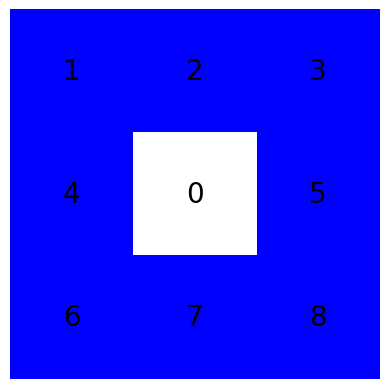

Passo 2: Mover 0 para posição 5


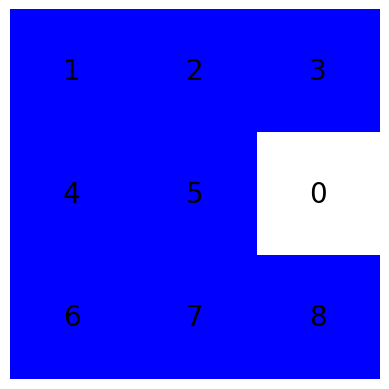

Passo 3: Mover 0 para posição 8


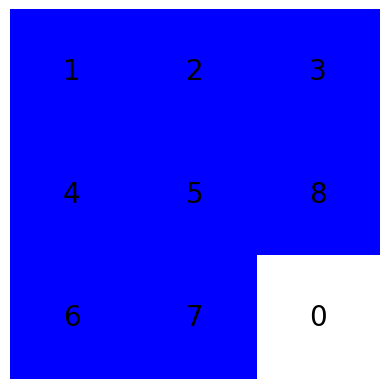

Passo 4: Mover 0 para posição 7


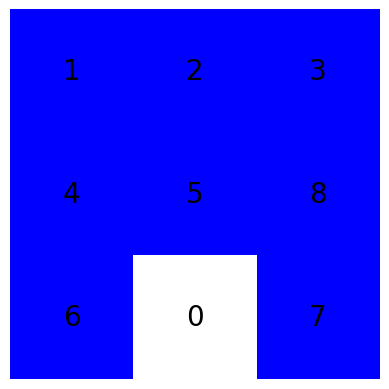

Passo 5: Mover 0 para posição 6


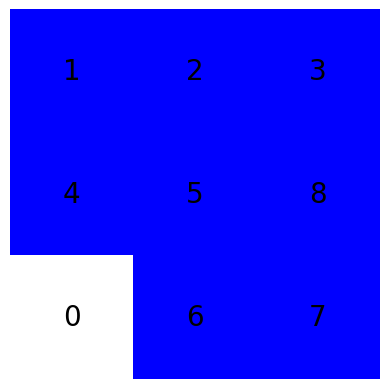

Passo 6: Mover 0 para posição 3


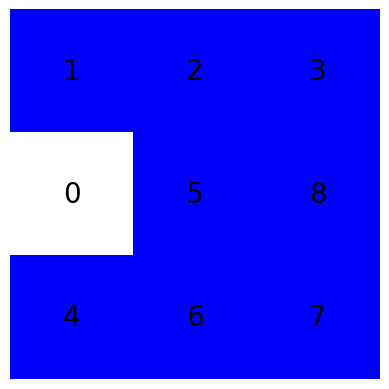

Passo 7: Mover 0 para posição 4


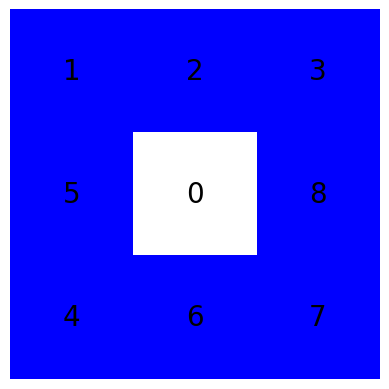

Passo 8: Mover 0 para posição 7


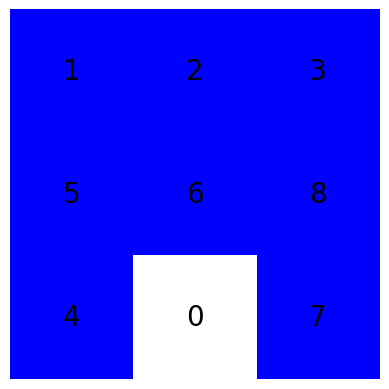

Passo 9: Mover 0 para posição 8


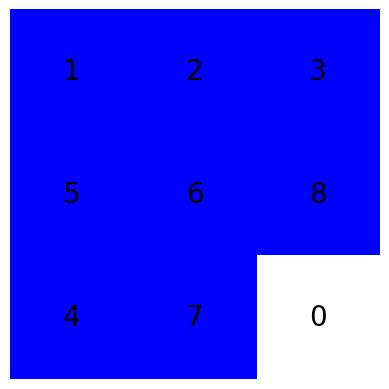

Passo 10: Mover 0 para posição 5


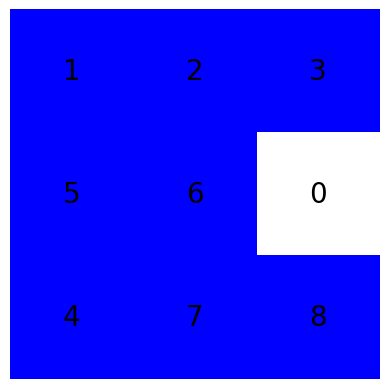

Passo 11: Mover 0 para posição 4


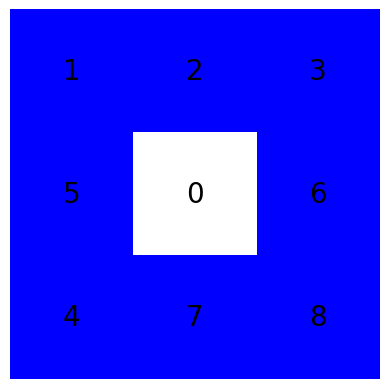

Passo 12: Mover 0 para posição 3


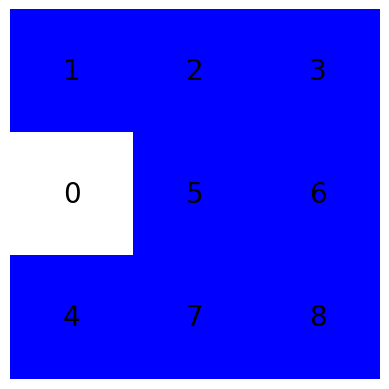

Passo 13: Mover 0 para posição 6


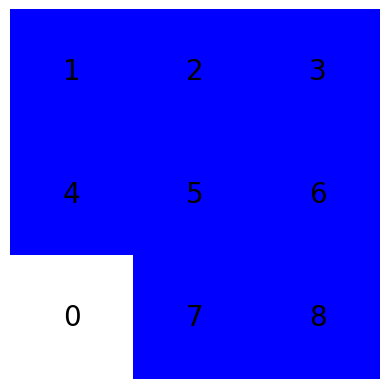

Passo 14: Mover 0 para posição 7


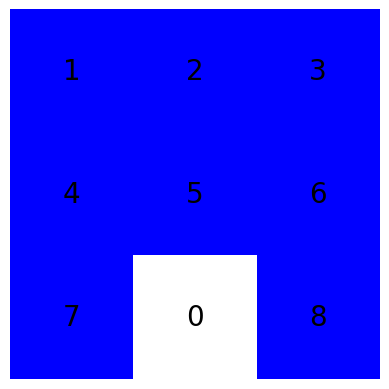

Passo 15: Mover 0 para posição 8


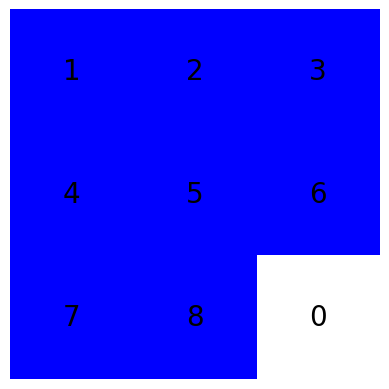

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from collections import deque

# Define o estado objetivo do tabuleiro
estado_objetivo = [1, 2, 3, 4, 5, 6, 7, 8, 0]  # 0 representa o espaço em branco

# Define as ações possíveis (movimentos)
acoes = {
    0: [1, 3],
    1: [0, 2, 4],
    2: [1, 5],
    3: [0, 4, 6],
    4: [1, 3, 5, 7],
    5: [2, 4, 8],
    6: [3, 7],
    7: [4, 6, 8],
    8: [5, 7]
}

def criar_tabuleiro(estado):
    tabuleiro = np.array(estado).reshape(3, 3)
    return tabuleiro

def desenhar_tabuleiro(tabuleiro):
    cmap = colors.ListedColormap(['white', 'blue'])
    bounds = [0, 0.5, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(tabuleiro, cmap=cmap, norm=norm)

    for i in range(3):
        for j in range(3):
            ax.text(j, i, tabuleiro[i, j], ha='center', va='center', fontsize=20)

    ax.grid(True, linewidth=2, color='black')
    plt.axis('off')
    plt.show()

def busca_largura(estado_inicial):
    fila = deque([(estado_inicial, [])])
    visitados = set()

    while fila:
        estado, caminho = fila.popleft()
        if estado == estado_objetivo:
            return caminho
        visitados.add(tuple(estado))

        # Encontra a posição do espaço em branco (0)
        pos_espaco = estado.index(0)

        # Gera os novos estados possíveis
        for acao in acoes[pos_espaco]:
            novo_estado = estado[:]
            novo_estado[pos_espaco], novo_estado[acao] = novo_estado[acao], novo_estado[pos_espaco]
            if tuple(novo_estado) not in visitados:
                fila.append((novo_estado, caminho + [acao]))

    return None  # Retorna None se nenhum caminho for encontrado

# Exemplo de uso
estado_inicial = [1, 2, 3, 0, 4, 5, 6, 7, 8]  # Tabuleiro inicial
caminho = busca_largura(estado_inicial)

if caminho is not None:
    # Visualiza o caminho
    estado_atual = estado_inicial[:]
    for i, movimento in enumerate(caminho):
        pos_espaco = estado_atual.index(0)
        estado_atual[pos_espaco], estado_atual[movimento] = estado_atual[movimento], estado_atual[pos_espaco]
        print(f"Passo {i + 1}: Mover {estado_atual[movimento]} para posição {movimento}")
        desenhar_tabuleiro(criar_tabuleiro(estado_atual))
else:
    print("Não foi possível encontrar uma solução para o estado inicial.")

